In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [7]:
model = pybamm.lithium_ion.DFN()
model = pybamm.lithium_ion.DFN(options={"thermal": "lumped"})
param = pybamm.ParameterValues("OKane2023")
param.update({"Ambient temperature [K]": 283.15})
param.update({"Initial temperature [K]": 283.15})
param.update({"Maximum concentration in negative electrode [mol.m-3]": 32544})
param.update({"Maximum concentration in positive electrode [mol.m-3]": 56598})
param.update({"Initial concentration in negative electrode [mol.m-3]": 28162})
param.update({"Initial concentration in positive electrode [mol.m-3]": 15281})
exp = pybamm.Experiment(["Discharge at 1C until 2.5 V"])

pts100 = {
    "x_n": 7,  # negative electrode
    "x_s": 7,  # separator 
    "x_p": 7,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 100,  # positive particle
}

sim100 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts100)
solution100 = sim100.solve(calc_esoh=False)

pts60 = {
    "x_n": 7,  # negative electrode
    "x_s": 7,  # separator 
    "x_p": 7,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 60,  # positive particle
}

sim60 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts60)
solution60 = sim60.solve(calc_esoh=False)

pts30 = {
    "x_n": 7,  # negative electrode
    "x_s": 7,  # separator 
    "x_p": 7,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 30,  # positive particle
}

sim30 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts30)
solution30 = sim30.solve(calc_esoh=False)

pts20 = {
    "x_n": 7,  # negative electrode
    "x_s": 7,  # separator 
    "x_p": 7,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 20,  # positive particle
}

sim20 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts20)
solution20 = sim20.solve(calc_esoh=False)

pts10 = {
    "x_n": 7,  # negative electrode
    "x_s": 7,  # separator 
    "x_p": 7,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 10,  # positive particle
}

sim10 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts10)
solution10 = sim10.solve(calc_esoh=False)

pts7 = {
    "x_n": 7,  # negative electrode
    "x_s": 7,  # separator 
    "x_p": 7,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 7,  # positive particle
}

sim7 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts7)
solution7 = sim7.solve(calc_esoh=False)

In [8]:
t100 = solution100["Time [s]"].entries
t60 = solution60["Time [s]"].entries
t30 = solution30["Time [s]"].entries
t20 = solution20["Time [s]"].entries
t10 = solution10["Time [s]"].entries
t7 = solution7["Time [s]"].entries

In [9]:
Q100 = solution100["Discharge capacity [A.h]"].entries
V100 = solution100["Terminal voltage [V]"].entries
Q60 = solution60["Discharge capacity [A.h]"].entries
V60 = solution60["Terminal voltage [V]"].entries
Q30 = solution30["Discharge capacity [A.h]"].entries
V30 = solution30["Terminal voltage [V]"].entries
Q20 = solution20["Discharge capacity [A.h]"].entries
V20 = solution20["Terminal voltage [V]"].entries
Q10 = solution10["Discharge capacity [A.h]"].entries
V10 = solution10["Terminal voltage [V]"].entries
Q7 = solution7["Discharge capacity [A.h]"].entries
V7 = solution7["Terminal voltage [V]"].entries

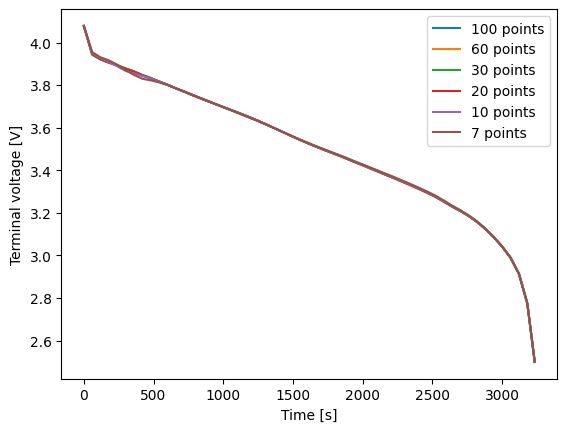

In [10]:
fig, ax = plt.subplots()
ax.plot(t100,V100,label="100 points")
ax.plot(t60,V60,label="60 points")
ax.plot(t30,V30,label="30 points")
ax.plot(t20,V20,label="20 points")
ax.plot(t10,V10,label="10 points")
ax.plot(t7,V7,label="7 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
#plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/asymmetric_1C_discharge_0point3C_charge_278K.pdf")
plt.show()

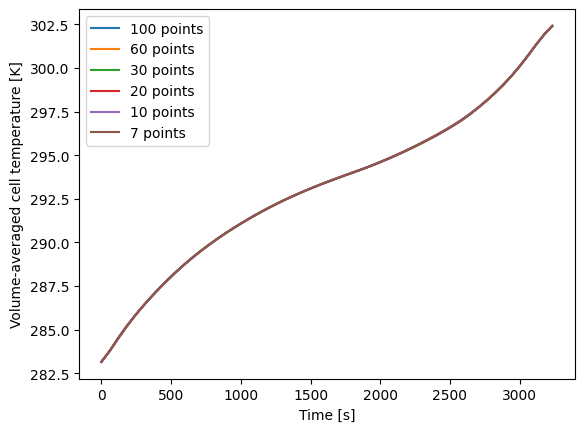

In [11]:
T100 = solution100["Volume-averaged cell temperature [K]"].entries
T60 = solution60["Volume-averaged cell temperature [K]"].entries
T30 = solution30["Volume-averaged cell temperature [K]"].entries
T20 = solution20["Volume-averaged cell temperature [K]"].entries
T10 = solution10["Volume-averaged cell temperature [K]"].entries
T7 = solution7["Volume-averaged cell temperature [K]"].entries
fig, ax = plt.subplots()
ax.plot(t100,T100,label="100 points")
ax.plot(t60,T60,label="60 points")
ax.plot(t30,T30,label="30 points")
ax.plot(t20,T20,label="20 points")
ax.plot(t10,T10,label="10 points")
ax.plot(t7,T7,label="7 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Volume-averaged cell temperature [K]")
ax.legend()
plt.show()

In [ ]:
t100_CV = solution100.cycles[2]["Time [s]"].entries
t60_CV = solution60.cycles[2]["Time [s]"].entries
t30_CV = solution30.cycles[2]["Time [s]"].entries
t20_CV = solution20.cycles[2]["Time [s]"].entries
I100 = solution100.cycles[2]["Current [A]"].entries
I60 = solution60.cycles[2]["Current [A]"].entries
I30 = solution30.cycles[2]["Current [A]"].entries
I20 = solution20.cycles[2]["Current [A]"].entries

In [ ]:
fig, ax = plt.subplots()
ax.plot(t100_CV,I100,label="100 points")
ax.plot(t60_CV,I60,label="60 points")
ax.plot(t30_CV,I30,label="30 points")
ax.plot(t20_CV,I20,label="20 points")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")
ax.legend()
plt.show()